In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
import glob

In [3]:
train_files=glob.glob("C:/Users/Rohan/OneDrive/Desktop/is_the_road_safe/assignment_5/flowers/*/**")

In [11]:
from random import shuffle
shuffle( train_files)

In [35]:
def flower_class(fl):
    if fl.find("astilbe") != -1 :
        return 1
    elif fl.find("bellflower") != -1 :
        return 2
    elif fl.find("black_eyed_susan") != -1 :
        return 3
    elif fl.find("calendula") != -1 :
        return 4
    elif fl.find("california_poppy") != -1 :
        return 5
    elif fl.find("carnation") != -1 :
        return 6
    elif fl.find("common_daisy") != -1 :
        return 7
    elif fl.find("coreopsis") != -1 :
        return 8
    elif fl.find("daffodil") != -1 :
        return 9
    elif fl.find("iris") != -1 :
        return 10
    elif fl.find("magnolia") != -1 :
        return 11
    elif fl.find("rose") != -1 :
        return 12
    elif fl.find("sunflower") != -1 :
        return 13
    elif fl.find("tulip") != -1 :
        return 14
    else:
        return 0  #water lily
    

In [6]:
from PIL import Image

In [39]:
X_train=np.zeros((len(train_files),64,64,3))
Y_train=np.zeros((len(train_files)))

for i,fl in enumerate(train_files):
    img = Image.open(fl)
    img = img.resize((64,64))
    arr = np.array(img)
    
    #image pixels normalized
    arr = arr/255
    
    
    if arr.shape == (64,64,3): #arrays that have other shape cannot fit in X_train
        X_train[i,:,:,:]=arr   
        
    Y_train[i] = flower_class(fl)

In [14]:
from matplotlib import pyplot as plt

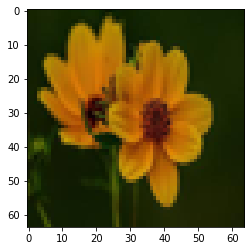

In [15]:
plt.imshow(X_train[0])

In [17]:
Y_train[0]

8.0

In [18]:
from keras import layers, Sequential

In [19]:
from keras.layers import Conv2D, Dense, Flatten

In [20]:
import keras_tuner

In [21]:
from keras_tuner import engine
from keras_tuner.engine.hyperparameters import HyperParameters as hp

In [40]:
def build_model(hp):
    model = Sequential()

    hp_filters = hp.Int('conv1_filters', min_value=60, max_value=160, step=32)
    hp_kernel_size = hp.Choice('conv_1_kernel', values = [3,5])
    model.add(Conv2D(
            filters=hp_filters,
            kernel_size=hp_kernel_size,
            activation='relu',
            input_shape=(64,64,3)
            )
        )
    
    model.add(Conv2D(
            filters=hp.Int("conv2_filters", min_value=32, max_value=64, step=16),
            kernel_size=hp.Choice("conv2_kernel", values=[3,5]),
            activation='relu',
        )
             )
              
    model.add(Flatten())
    
    model.add(Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
                    )
        )
              
    model.add(Dense(15, activation='softmax')
             )
    #compiling all the layers
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [41]:
tuner_search=keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=6,
    directory='output_15_only',
)

INFO:tensorflow:Reloading Oracle from existing project output_15_only\untitled_project\oracle.json


In [42]:
tuner_search.search(X_train, Y_train, epochs=2, validation_split=0.2)

Trial 6 Complete [00h 11m 28s]
val_accuracy: 0.45266836881637573

Best val_accuracy So Far: 0.45266836881637573
Total elapsed time: 01h 15m 22s
INFO:tensorflow:Oracle triggered exit


In [43]:
model = tuner_search.get_best_models(num_models=1)[0]

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 92)        2576      
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 48)        110448    
                                                                 
 flatten (Flatten)           (None, 161472)            0         
                                                                 
 dense (Dense)               (None, 112)               18084976  
                                                                 
 dense_1 (Dense)             (None, 15)                1695      
                                                                 
Total params: 18,199,695
Trainable params: 18,199,695
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train, Y_train, epochs=5, validation_split=0.2, initial_epoch=2)

Epoch 3/5
394/394 [==============================] - 307s 778ms/step - loss: 1.2832 - accuracy: 0.5705 - val_loss: 1.4885 - val_accuracy: 0.4949
Epoch 4/5
394/394 [==============================] - 508s 1s/step - loss: 0.7916 - accuracy: 0.7391 - val_loss: 1.6423 - val_accuracy: 0.5054
Epoch 5/5
394/394 [==============================] - 317s 806ms/step - loss: 0.3157 - accuracy: 0.8986 - val_loss: 2.0842 - val_accuracy: 0.4911


In [58]:
sample_files=glob.glob("C:/Users/Rohan/OneDrive/Desktop/is_the_road_safe/assignment_5/sample_of_flowers/*")

In [63]:
sample_files

['C:/Users/Rohan/OneDrive/Desktop/is_the_road_safe/assignment_5/sample_of_flowers\\1216789_7e50c0f967_c.jpg',
 'C:/Users/Rohan/OneDrive/Desktop/is_the_road_safe/assignment_5/sample_of_flowers\\169563029_6a3d5168d7_c.jpg',
 'C:/Users/Rohan/OneDrive/Desktop/is_the_road_safe/assignment_5/sample_of_flowers\\22085861_543dc248fa_c.jpg',
 'C:/Users/Rohan/OneDrive/Desktop/is_the_road_safe/assignment_5/sample_of_flowers\\493740374_ebaddfed31_c.jpg',
 'C:/Users/Rohan/OneDrive/Desktop/is_the_road_safe/assignment_5/sample_of_flowers\\50721596_a5a255da80_c.jpg',
 'C:/Users/Rohan/OneDrive/Desktop/is_the_road_safe/assignment_5/sample_of_flowers\\9525220_63e9effb95_c.jpg']

In [71]:
X_sample=np.zeros((6,64,64,3))
for i,fl in enumerate(sample_files):
    img = Image.open(fl)
    img = img.resize((64,64))
    arr = np.array(img)
    
    #image pixels normalized
    arr = arr/255
    
    X_sample[i,:,:,:]=arr

In [72]:
predictions=model.predict(X_check)

1/1 [==============================] - 0s 34ms/step


In [73]:
predictions

array([[1.01407397e-06, 7.65228776e-07, 3.60646579e-09, 1.70033013e-21,
        3.77444825e-10, 2.18202956e-07, 8.58286023e-01, 2.84454643e-07,
        7.26969551e-14, 3.09379448e-13, 8.22885582e-09, 1.15677703e-05,
        1.41664669e-01, 4.52036938e-22, 3.54507501e-05],
       [2.12749335e-04, 2.58019281e-04, 1.67388842e-03, 1.87773352e-08,
        2.66069208e-07, 2.19993337e-04, 1.28818228e-05, 9.96386170e-01,
        5.00716533e-06, 1.08434295e-04, 9.42108338e-04, 1.46817893e-05,
        2.67661494e-06, 5.74875223e-08, 1.63042962e-04],
       [9.07435751e-05, 9.87946570e-01, 3.37129633e-04, 3.22400151e-09,
        1.08974462e-04, 1.06108804e-04, 2.82049965e-04, 6.89476146e-05,
        2.51521925e-07, 1.08915845e-08, 1.04456826e-03, 6.16586249e-06,
        1.15690826e-04, 2.01312315e-13, 9.89277754e-03],
       [1.16613133e-04, 2.17690199e-10, 1.80177456e-10, 2.30754426e-06,
        3.98795564e-05, 3.50925402e-05, 7.51453211e-09, 4.93281718e-08,
        1.83277309e-03, 2.35369866e-0

In [74]:
out=np.argmax(predictions,axis=1)

In [75]:
out

array([ 6,  7,  1, 14, 13,  0], dtype=int64)

In [89]:
def flower_name(x):
    
    if x==1:
        return "astilbe"
    elif x==2:
        return "bellflower"
    elif x==7:
        return "common daisy"
    elif x==9:
        return "daffodil"
    elif x==13:
        return "rose"
    elif x==14:
        return "tulip"
    elif x==0:
        return "water lily"
    else:
        return "some other flower"

model says this is common daisy


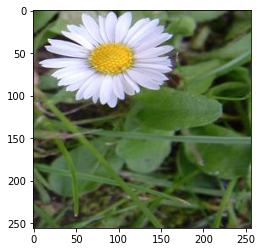

In [90]:
print("model says this is", flower_name(out[1]))
plt.imshow(Image.open(sample_files[1]))

model says this is astilbe


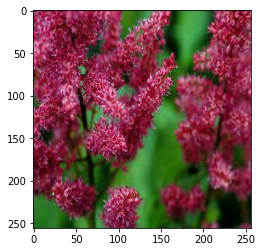

In [91]:
print("model says this is", flower_name(out[2]))
plt.imshow(Image.open(sample_files[2]))

model says this is tulip


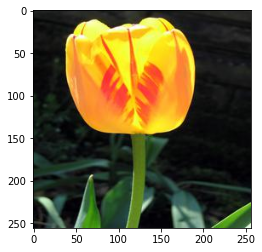

In [92]:
print("model says this is", flower_name(out[3]))
plt.imshow(Image.open(sample_files[3]))